Find the best number of clusters for kmeans :


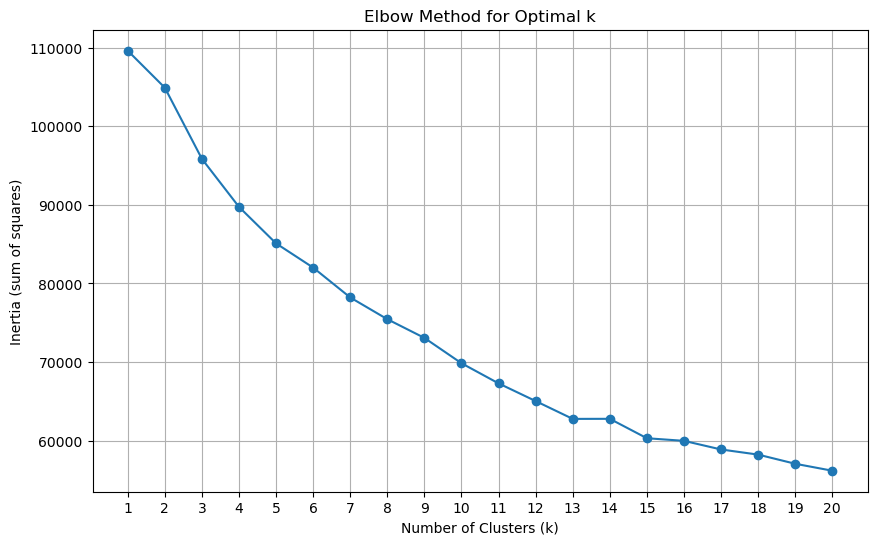

By inertia we can see best number of cluster is 3 or 4 :


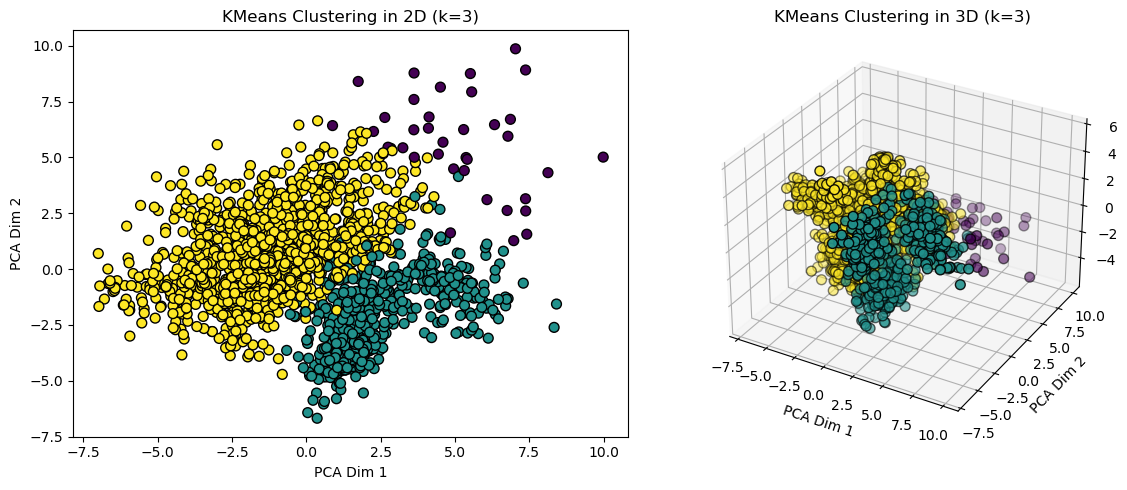

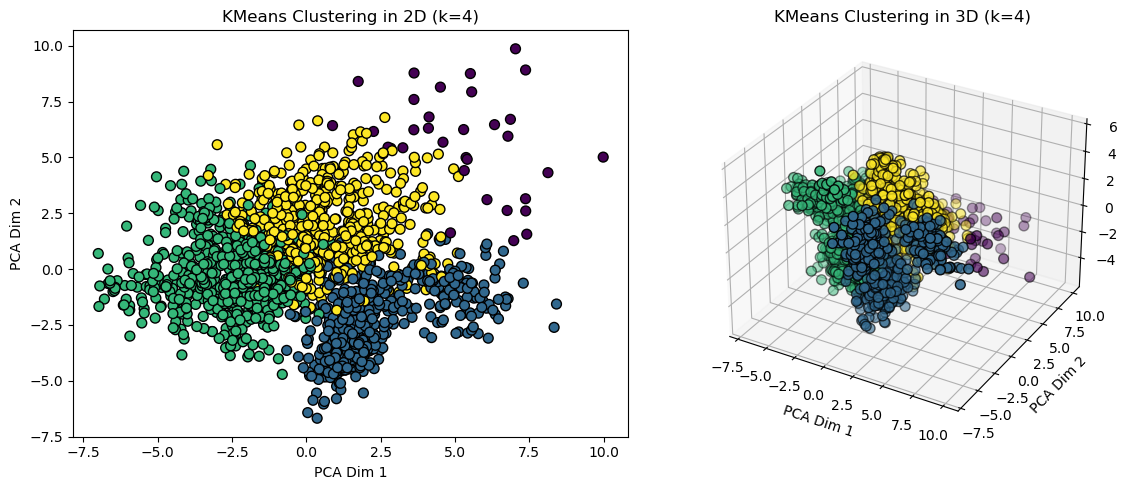

DBSCAN clusterings : 


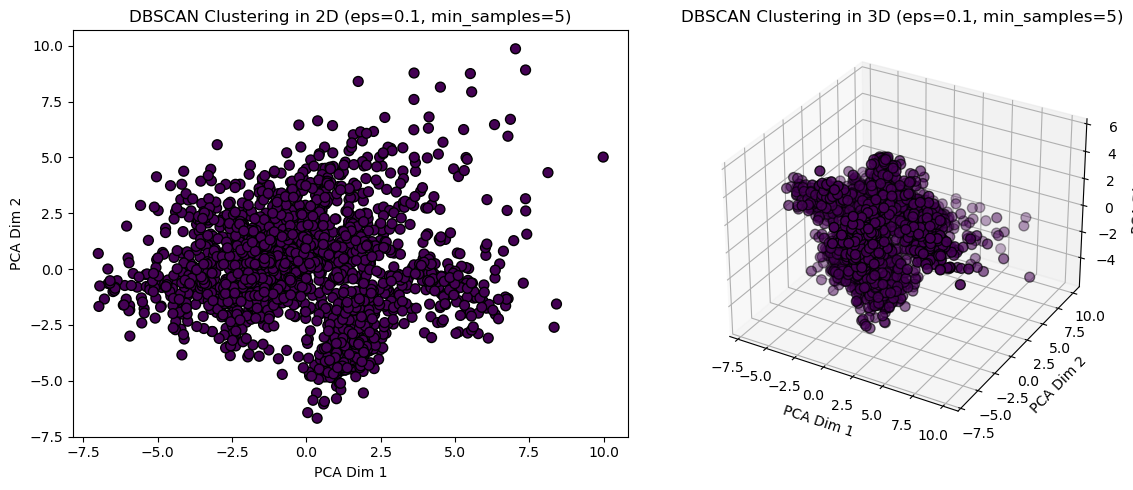

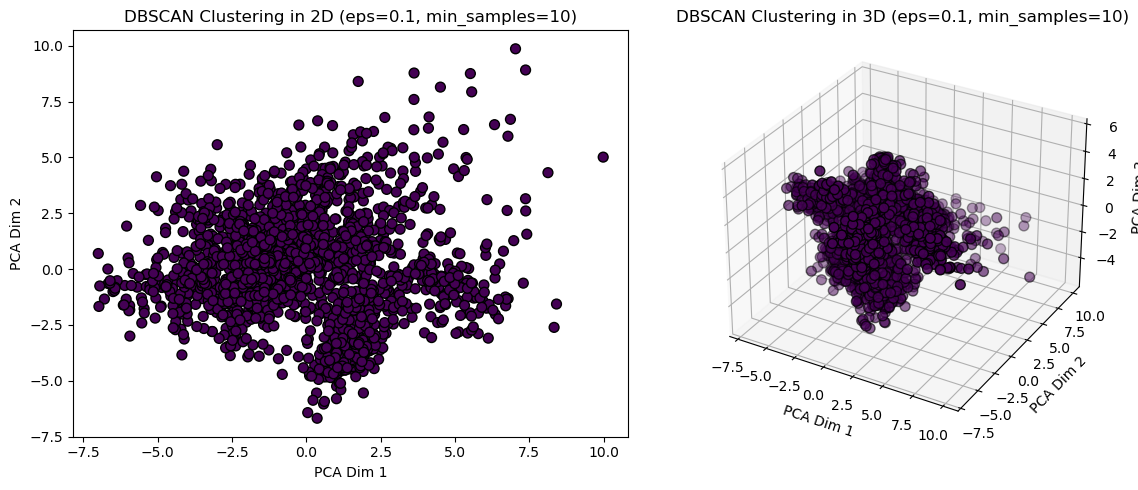

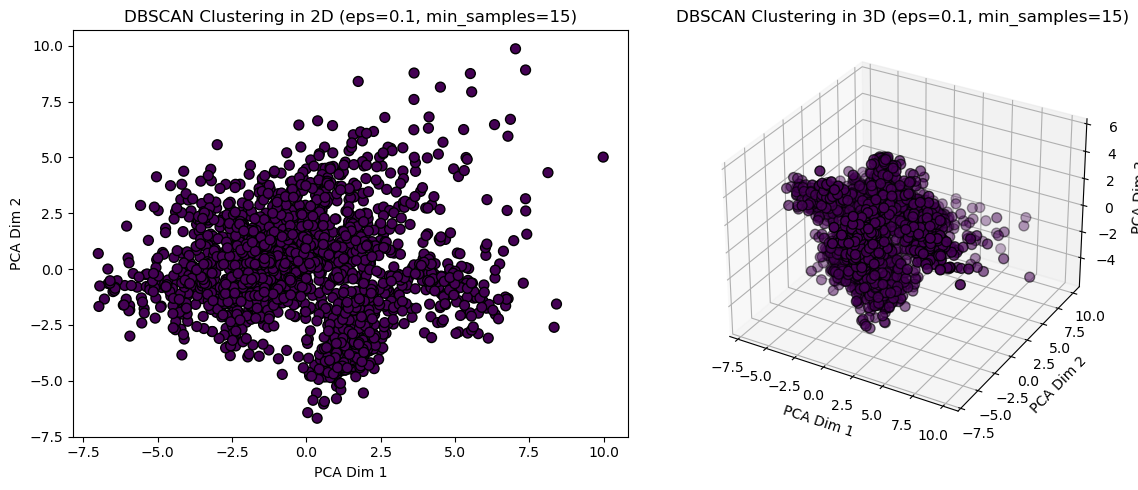

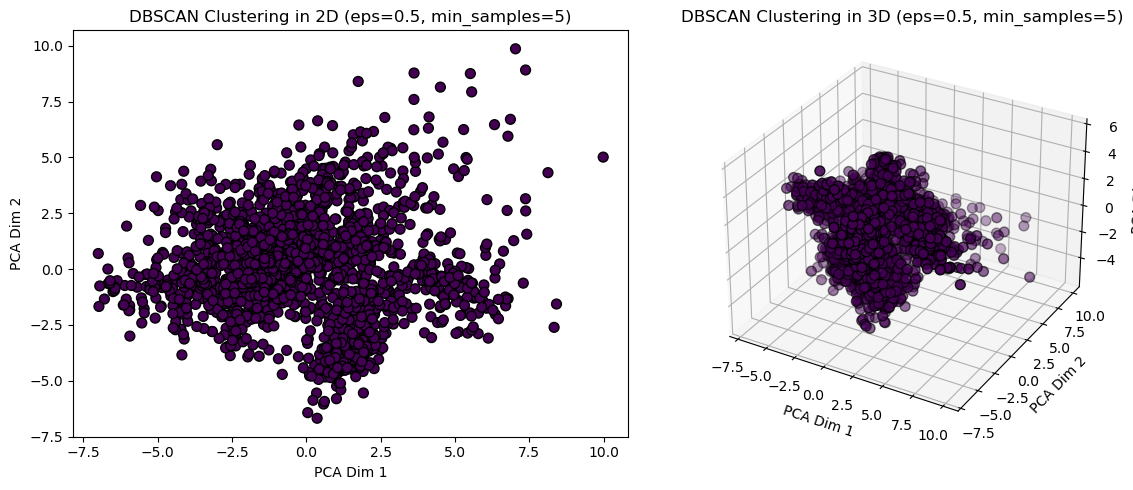

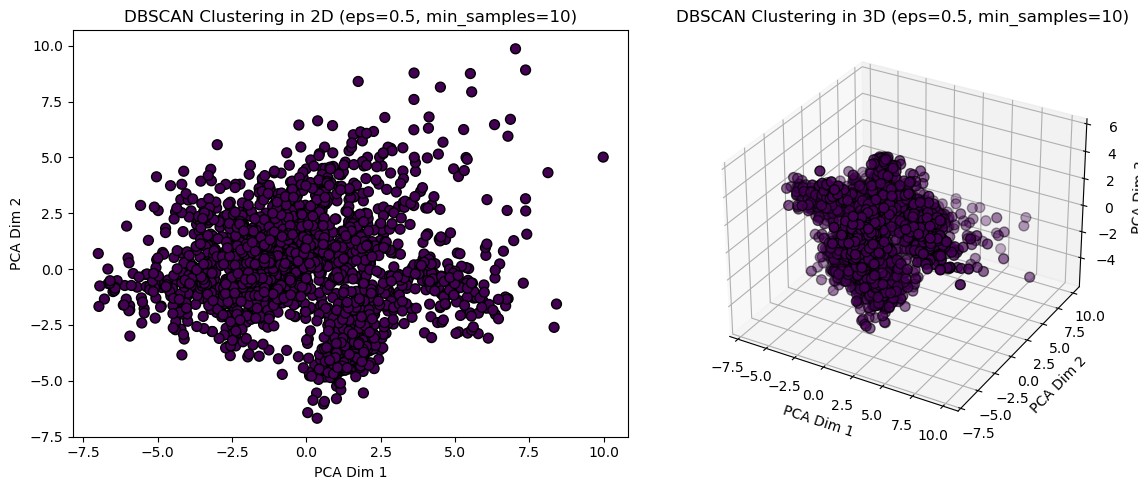

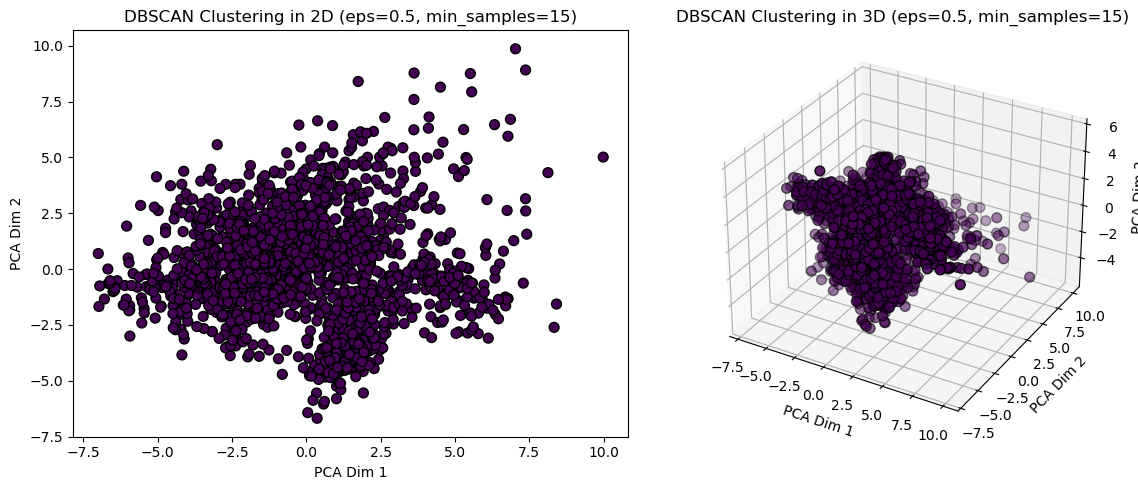

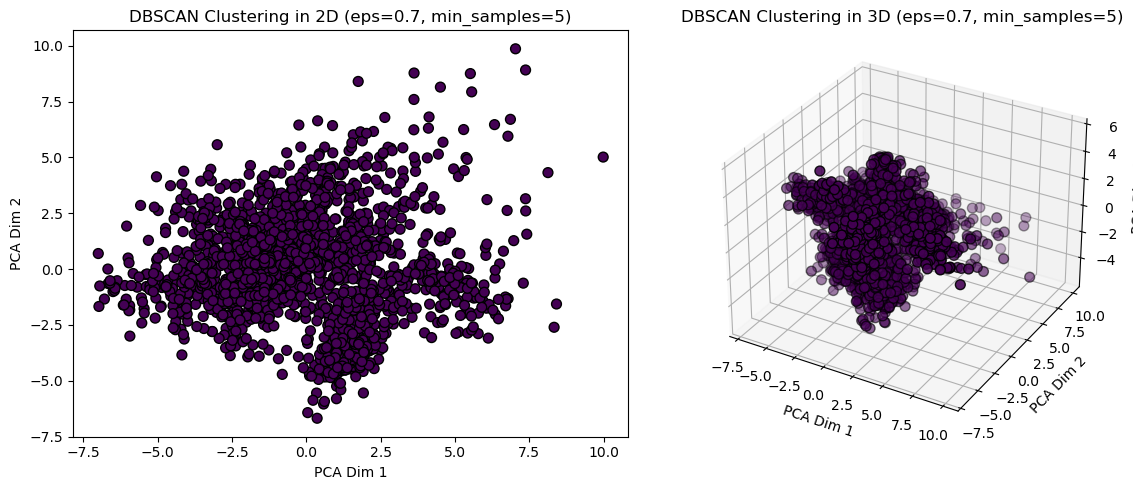

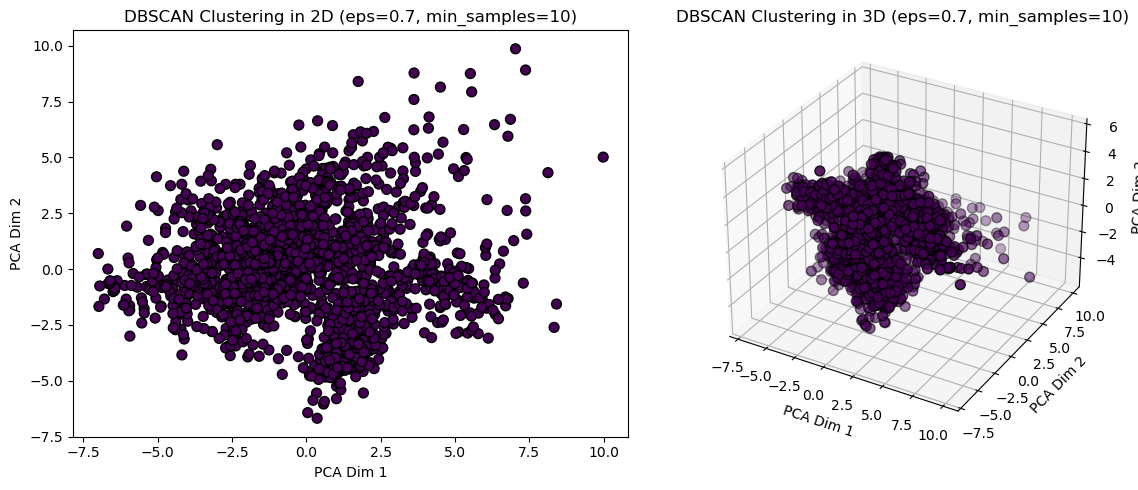

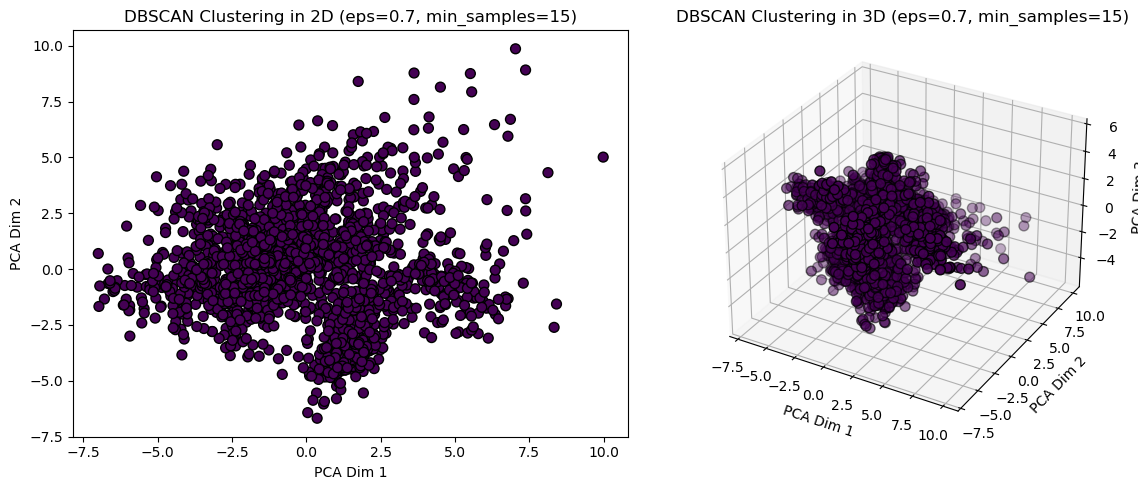

Regarding to the plots we can see DBSCAN is not the good way for this clustering and kmeans is doing it very better !!!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

def kmeans_clustering_pca(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    pca_2d = PCA(n_components=2)
    X_2d = pca_2d.fit_transform(X)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'KMeans Clustering in 2D (k={k})')
    plt.xlabel('PCA Dim 1')
    plt.ylabel('PCA Dim 2')

    pca_3d = PCA(n_components=3)
    X_3d = pca_3d.fit_transform(X)
    ax = plt.subplot(1, 2, 2, projection='3d')
    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    ax.set_title(f'KMeans Clustering in 3D (k={k})')
    ax.set_xlabel('PCA Dim 1')
    ax.set_ylabel('PCA Dim 2')
    ax.set_zlabel('PCA Dim 3')
    plt.tight_layout()
    plt.show()

def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    pca_2d = PCA(n_components=2)
    X_2d = pca_2d.fit_transform(X)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'DBSCAN Clustering in 2D (eps={eps}, min_samples={min_samples})')
    plt.xlabel('PCA Dim 1')
    plt.ylabel('PCA Dim 2')

    pca_3d = PCA(n_components=3)
    X_3d = pca_3d.fit_transform(X)
    ax = plt.subplot(1, 2, 2, projection='3d')
    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    ax.set_title(f'DBSCAN Clustering in 3D (eps={eps}, min_samples={min_samples})')
    ax.set_xlabel('PCA Dim 1')
    ax.set_ylabel('PCA Dim 2')
    ax.set_zlabel('PCA Dim 3')
    plt.tight_layout()
    plt.show()

digits = load_digits()
X = digits.data
y = digits.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_values = range(1, 21)

print("Find the best number of clusters for kmeans :")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (sum of squares)')
plt.xticks(k_values)
plt.grid()
plt.show()

print("By inertia we can see best number of cluster is 3 or 4 :")
kmeans_clustering_pca(X_scaled, 3)
kmeans_clustering_pca(X_scaled, 4)

eps_values = [0.1, 0.5, 0.7]
min_samples_values = [5, 10, 15]

print("DBSCAN clusterings : ")

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_clustering(X_scaled, eps, min_samples)

print("Regarding to the plots we can see DBSCAN is not the good way for this clustering and kmeans is doing it very better !!!")